<a href="https://colab.research.google.com/github/dyjs-js/DaconStudy/blob/main/kaggle/kaggle_A_I_information_Security_20221108.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#데이터 불러오기

In [14]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [25]:
!mkdir -p '/content/gdrive/My Drive/dkudata2/.kaggle'
%cd /content/gdrive/My Drive/dkudata2/.kaggle

/content/gdrive/My Drive/dkudata2/.kaggle


In [26]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jisooyeondd","key":"1884f18cf3f85a2c10b0d3ab8a730fe6"}'}

In [27]:
# 내 kaggle 토근의 위치 설정
import os
os.environ['KAGGLE_CONFIG_DIR']="/content/gdrive/My Drive/dkudata2/.kaggle/"

!ls -l '/content/gdrive/My Drive/dkudata2/.kaggle'

total 1
-rw------- 1 root root 67 Nov 23 07:54 kaggle.json


In [28]:
!kaggle datasets list

ref                                                         title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
akshaydattatraykhare/diabetes-dataset                       Diabetes Dataset                                      9KB  2022-10-06 08:55:25          16949        489  1.0              
akshaydattatraykhare/data-for-admission-in-the-university   Data for Admission in the University                  4KB  2022-10-27 11:05:45           4491        107  1.0              
thedevastator/jobs-dataset-from-glassdoor                   Salary Prediction                                     3MB  2022-11-16 13:52:31           1004         32  1.0              
piterfm/fifa-football-world-cup                             FIFA Football World 

In [29]:
# specific dataset search
!kaggle datasets list -s [Malware]

ref                                                         title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
cdeotte/malware-timestamps                                  Malware Timestamps                               416KB  2019-01-17 14:19:25           1338         64  0.625            
piyushrumao/malware-executable-detection                    Malware Executable Detection                      27KB  2020-06-30 18:15:45           1515         24  0.9705882        
cdeotte/malware-timestamps-2                                Malware Timestamps 2                               8KB  2019-01-25 02:19:55            510         46  0.5625           
saurabhshahane/classification-of-malwares                   Classification of Malwares (CLaMP) 

In [30]:
!pwd

/content/gdrive/My Drive/dkudata2/.kaggle


In [31]:
#We will use the malware analysis: PE section headers dataset
!kaggle datasets list -s ang3loliveira/malware-analysis-datasets-pe-section-headers

ref                                                         title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ---------------------------------------------  ----  -------------------  -------------  ---------  ---------------  
ang3loliveira/malware-analysis-datasets-pe-section-headers  Malware Analysis Datasets: PE Section Headers   1MB  2019-08-14 17:38:19            861         12  0.7058824        


In [32]:
#Download & Unzip the dataset
!kaggle datasets download -d ang3loliveira/malware-analysis-datasets-pe-section-headers

  0% 0.00/1.25M [00:00<?, ?B/s]
100% 1.25M/1.25M [00:00<00:00, 70.6MB/s]


In [33]:
!unzip malware-analysis-datasets-pe-section-headers.zip

Archive:  malware-analysis-datasets-pe-section-headers.zip
  inflating: pe_section_headers.csv  


In [34]:
!ls -l

total 4308
-rw------- 1 root root      67 Nov 23 07:54 kaggle.json
-rw------- 1 root root 1307424 Nov 23 07:54 malware-analysis-datasets-pe-section-headers.zip
-rw------- 1 root root 3102951 Aug 14  2019 pe_section_headers.csv


In [36]:
#load data from the file
import pandas as pd
dataset=pd.read_csv("./pe_section_headers.csv")
dataset

,hash,size_of_data,virtual_address,entropy,virtual_size,malware
0,071e8c3f8922e186e57548cd4c703a5d,443392,4096,6.529624,442984,1
1,33f8e6d08a6aae939f25a8e0d63dd523,331264,4096,6.604314,330784,1
2,b68abd064e975e1c6d5f25e748663076,74240,4096,6.046789,73819,1
3,72049be7bd30ea61297ea624ae198067,219648,4096,6.497018,219524,1
4,c9b3700a77facf29172f32df6bc77f48,262144,4096,6.638142,261943,1
...,...,...,...,...,...,...
43288,9b917bab7f32188ae40c744f2be9aaf8,286720,4096,6.585726,286359,1
43289,35a18ee05f75f04912018d9f462cb990,262144,4096,6.638142,261943,1
43290,654139d715abcf7ecdddbef5a84f224b,262144,4096,6.638142,261943,1
43291,078c9d4e7be4819a06974c6f292a4857,443392,4096,6.529624,442984,1


In [37]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43293 entries, 0 to 43292
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hash             43293 non-null  object 
 1   size_of_data     43293 non-null  int64  
 2   virtual_address  43293 non-null  int64  
 3   entropy          43293 non-null  float64
 4   virtual_size     43293 non-null  int64  
 5   malware          43293 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 2.0+ MB


In [38]:
dataset['malware'].value_counts()
#target=malware 1=malware, 0=non malware

1    41568
0     1725
Name: malware, dtype: int64

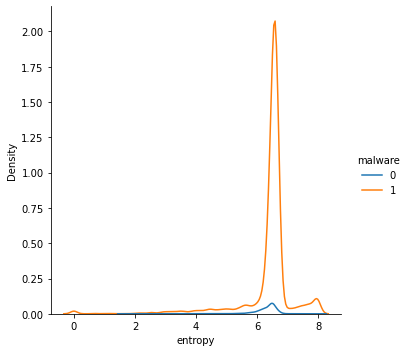

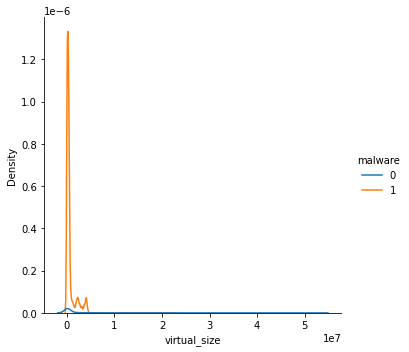

In [39]:
import seaborn as sns
sns.displot(data=dataset, x="entropy", hue="malware", kind='kde')
sns.displot(data=dataset, x="virtual_size", hue="malware", kind='kde')

#virtual size -> 파일로있을때보다 메모리에서 실행될때의 사이즈

,size_of_data,virtual_address,entropy,virtual_size,malware
size_of_data,1.000000,-0.017352,-0.002101,0.986949,-0.007240
virtual_address,-0.017352,1.000000,-0.017900,-0.016843,0.008876
entropy,-0.002101,-0.017900,1.000000,-0.022811,0.016476
virtual_size,0.986949,-0.016843,-0.022811,1.000000,-0.005979
malware,-0.007240,0.008876,0.016476,-0.005979,1.000000


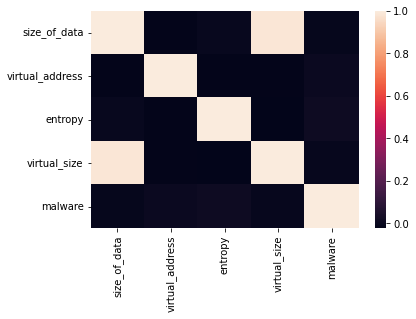

In [40]:
sns.heatmap(dataset.corr())
dataset.corr()

In [41]:
x=dataset.drop(['malware', 'hash'],axis=1) # 식별자와 정답
y=dataset['malware']


In [42]:
from sklearn.metrics import f1_score, recall_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler #일정한 범위로 스케일링할때


In [81]:
#Split the train and test data (train:test = 8:2)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=2)

In [82]:
#Feature Scaling
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
#fit_transform 주어진데이터를 스케일러의 범위를 맞춤 0~1 사이로??
#transform은 fit_ 함수를 토대로 test셋에 적용을 하는데 fit_transform을 test셋으로 다시 적용하면 0~1사이가 아닐수있기때문에
#transform만 함


# KNN classifier

In [83]:
# KNN classifier 모델 적용
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier()
kNN.fit(x_train,y_train)
y_pred = kNN.predict(x_test)

In [84]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)
accuracy = accuracy_score(y_pred, y_test)
print('Accuracy: {}'.format(accuracy))
print('F1 Score: {}'.format(f1_score(y_test,y_pred,zero_division=1)))
print(classification_report(y_test,y_pred))

# malware=malware 라고 예측 8251 
# 0 양성 1 음성


[[ 120  230]
 [  70 8239]]
Accuracy: 0.9653539669707818
F1 Score: 0.9821194421265944
              precision    recall  f1-score   support

           0       0.63      0.34      0.44       350
           1       0.97      0.99      0.98      8309

    accuracy                           0.97      8659
   macro avg       0.80      0.67      0.71      8659
weighted avg       0.96      0.97      0.96      8659



# DecisionTreeClassifier

In [85]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,test_size=0.2, random_state=2)

In [86]:
#Feature Scaling
sc=StandardScaler()
x_train1=sc.fit_transform(x_train1)
x_test1=sc.transform(x_test1)
#fit_transform 주어진데이터를 스케일러의 범위를 맞춤 0~1 사이로??
#transform은 fit_ 함수를 토대로 test셋에 적용을 하는데 fit_transform을 test셋으로 다시 적용하면 0~1사이가 아닐수있기때문에
#transform만 함

In [87]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree=DecisionTreeClassifier()
DecisionTree.fit(x_train1, y_train1)
y_pred1=DecisionTree.predict(x_test1)

In [88]:
confmat = confusion_matrix(y_true=y_test1, y_pred=y_pred1)
print(confmat)
accuracy = accuracy_score(y_pred1, y_test1)
print('Accuracy: {}'.format(accuracy))
print('F1 Score: {}'.format(f1_score(y_test1,y_pred1,zero_division=1)))
print(classification_report(y_test1,y_pred1))

[[ 173  177]
 [ 170 8139]]
Accuracy: 0.959926088462871
F1 Score: 0.9791278195488723
              precision    recall  f1-score   support

           0       0.50      0.49      0.50       350
           1       0.98      0.98      0.98      8309

    accuracy                           0.96      8659
   macro avg       0.74      0.74      0.74      8659
weighted avg       0.96      0.96      0.96      8659



# RandomForestClassifier

In [89]:
x_train2,x_test2,y_train2,y_test2=train_test_split(x,y,test_size=0.2, random_state=2)

In [90]:
#Feature Scaling
sc=StandardScaler()
x_train2=sc.fit_transform(x_train2)
x_test2=sc.transform(x_test2)

In [91]:
from sklearn.ensemble import RandomForestClassifier
RandomF=RandomForestClassifier()
RandomF.fit(x_train2, y_train2)
y_pred2=RandomF.predict(x_test2)

In [92]:
confmat = confusion_matrix(y_true=y_test2, y_pred=y_pred2)
print(confmat)
accuracy = accuracy_score(y_pred2, y_test2)
print('Accuracy: {}'.format(accuracy))
print('F1 Score: {}'.format(f1_score(y_test2,y_pred2,zero_division=1)))
print(classification_report(y_test2,y_pred2))

[[ 156  194]
 [  66 8243]]
Accuracy: 0.9699734380413443
F1 Score: 0.9844739042159321
              precision    recall  f1-score   support

           0       0.70      0.45      0.55       350
           1       0.98      0.99      0.98      8309

    accuracy                           0.97      8659
   macro avg       0.84      0.72      0.76      8659
weighted avg       0.97      0.97      0.97      8659



# MLPClassifier

In [93]:
x_train3,x_test3,y_train3,y_test3=train_test_split(x,y,test_size=0.2, random_state=2)

In [94]:
#Feature Scaling
sc=StandardScaler()
x_train3=sc.fit_transform(x_train3)
x_test3=sc.transform(x_test3)

In [95]:
from sklearn.neural_network import MLPClassifier
MLPC=MLPClassifier()
MLPC.fit(x_train3, y_train3)
y_pred3=MLPC.predict(x_test3)

In [96]:
confmat = confusion_matrix(y_true=y_test3, y_pred=y_pred3)
print(confmat)
accuracy = accuracy_score(y_pred3, y_test3)
print('Accuracy: {}'.format(accuracy))
print('F1 Score: {}'.format(f1_score(y_test3,y_pred3,zero_division=1)))
print(classification_report(y_test3,y_pred3))

[[   5  345]
 [   5 8304]]
Accuracy: 0.9595796281325788
F1 Score: 0.979360773676141
              precision    recall  f1-score   support

           0       0.50      0.01      0.03       350
           1       0.96      1.00      0.98      8309

    accuracy                           0.96      8659
   macro avg       0.73      0.51      0.50      8659
weighted avg       0.94      0.96      0.94      8659



# ROC Curve

In [97]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

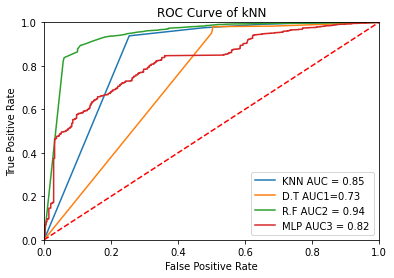

In [100]:
# predict 는 0과 1
# predict_proba는 0과 1사이의 스코어로 받을 수 있음
# roc와 auc 그래프 그려보기
# y_scores[:, 1] 두개가나옴 -> 0클래스에 대한 스코어, 1클래스에 대한 스코어 2개가 나오기때문에
# 우리가 얼마나 악성코드에 가까운 스코어가 필요하기 때문에 0번은 버리고 모든샘플에 대해서 1번만

#roc curve 그리기
y_scores = kNN.predict_proba(x_test)
y_scores1=DecisionTree.predict_proba(x_test1)
y_scores2=RandomF.predict_proba(x_test2)
y_scores3=MLPC.predict_proba(x_test3)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
fpr1, tpr1, threshold1 = roc_curve(y_test1, y_scores1[:, 1])
fpr2, tpr2, threshold2 = roc_curve(y_test2, y_scores2[:, 1])
fpr3, tpr3, threshold3 = roc_curve(y_test3, y_scores3[:, 1])

roc_auc = auc(fpr, tpr)
roc_auc1=auc(fpr1, tpr1)
roc_auc2=auc(fpr2, tpr2)
roc_auc3=auc(fpr3, tpr3)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label = 'KNN AUC = %0.2f' % roc_auc)
plt.plot(fpr1, tpr1, label='D.T AUC1=%0.2f'%roc_auc1)
plt.plot(fpr2, tpr2, label = 'R.F AUC2 = %0.2f' % roc_auc2)
plt.plot(fpr3, tpr3, label = 'MLP AUC3 = %0.2f' % roc_auc3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()
